# IMPORT LIBRARY

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
import joblib

# IMPORT DATASET

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
# menampilkan 5 data teratas
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
# menampilkan 10 data random
df.sample(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
687,1.0,107.0,50.000000,19.0,0.000000,28.3,0.181000,29.0,0.0
292,2.0,128.0,78.000000,37.0,182.000000,43.3,0.471876,31.0,1.0
695,7.0,142.0,90.000000,24.0,79.799479,30.4,0.128000,43.0,1.0
330,8.0,118.0,72.000000,19.0,0.000000,23.1,0.471876,46.0,0.0
430,2.0,99.0,69.105469,0.0,0.000000,22.2,0.108000,23.0,0.0
296,2.0,146.0,70.000000,38.0,79.799479,28.0,0.337000,29.0,1.0
299,8.0,112.0,72.000000,0.0,0.000000,23.6,0.840000,58.0,0.0
194,8.0,85.0,55.000000,20.0,0.000000,24.4,0.136000,42.0,0.0
576,6.0,108.0,44.000000,20.0,130.000000,24.0,0.813000,35.0,0.0
469,6.0,154.0,78.000000,41.0,140.000000,46.1,0.571000,27.0,0.0


# DATA AKUISISI

In [41]:
# menampilkan nama nama kolom (variabel/feature)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [42]:
# melihat ukuran data
df.shape
df.size

6912

Terdapat 768 baris dengan 9 kolom dengan ukuran data sebesar 6912

In [43]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    object
 1   Glucose                   768 non-null    object
 2   BloodPressure             768 non-null    object
 3   SkinThickness             768 non-null    object
 4   Insulin                   768 non-null    object
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    object
 8   Outcome                   768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [73]:
# mengganti tipe data variabel IPM dari object menjadi float64
print('======= Info Dataset =======')
print('Total Rows    : ', df.shape[0])
print('Total Columns : ', df.shape[1])

print('\n======= Detail Info Dataset =======')
df['Pregnancies'] = df['Pregnancies'].astype('float64')
df['Glucose'] = df['Glucose'].astype('float64')
df['BloodPressure'] = df['BloodPressure'].astype('float64')
df['SkinThickness'] = df['SkinThickness'].astype('float64')
df['Insulin'] = df['Insulin'].astype('float64')
df['Age'] = df['Age'].astype('float64')
df['Outcome'] = df['Outcome'].astype('float64')
df.info(memory_usage = False)

======= Info Dataset =======
Total Rows    :  768
Total Columns :  9

======= Detail Info Dataset =======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    object 
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(7), object(2)

In [74]:
#handling nilai null
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\Punni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.9% of the 

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

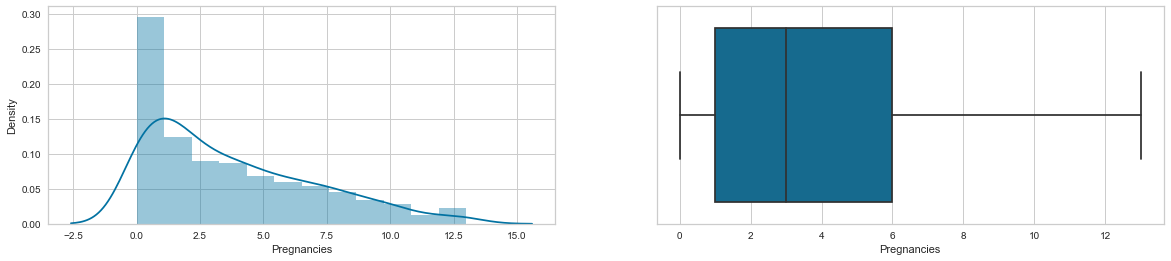

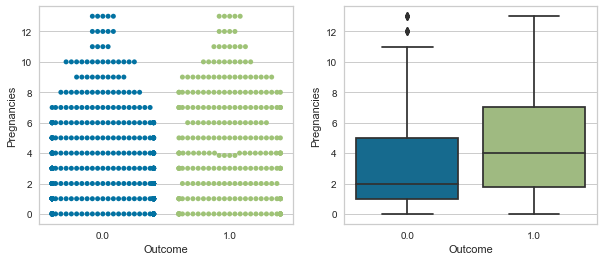

In [75]:
# --- Visualisasi variabel Pregnancies
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Pregnancies'])

f.add_subplot(1,2,2)
sns.boxplot(df['Pregnancies'])

# --- Visualisasi variabel Outcome berdasarkan Pregnancies
f = plt.figure(figsize=(10,4))

f.add_subplot(1,2,1)
sns.swarmplot(x=df['Outcome'], y=df['Pregnancies'])

f.add_subplot(1,2,2)
sns.boxplot(x=df['Outcome'], y=df['Pregnancies'])

C:\Users\Punni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

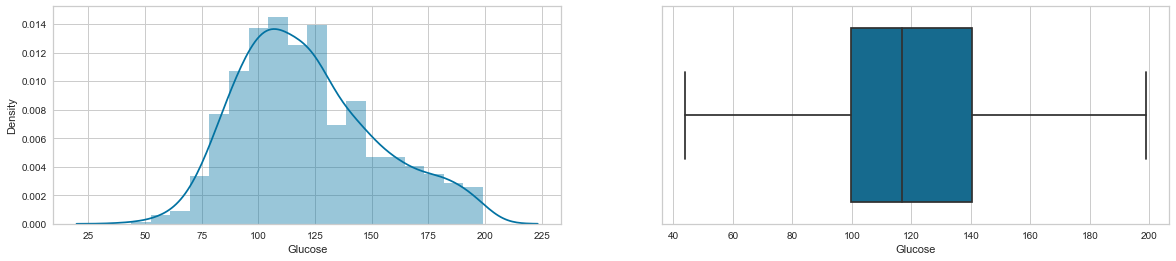

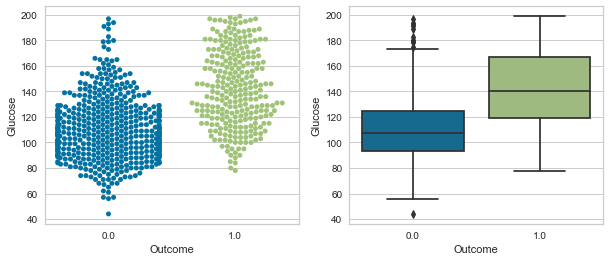

In [76]:
# --- Visualisasi variabel Glucose
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Glucose'])

f.add_subplot(1,2,2)
sns.boxplot(df['Glucose'])

# --- Visualisasi variabel Outcome berdasarkan Glucose
f = plt.figure(figsize=(10,4))

f.add_subplot(1,2,1)
sns.swarmplot(x=df['Outcome'], y=df['Glucose'])

f.add_subplot(1,2,2)
sns.boxplot(x=df['Outcome'], y=df['Glucose'])

C:\Users\Punni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.1% of the 

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

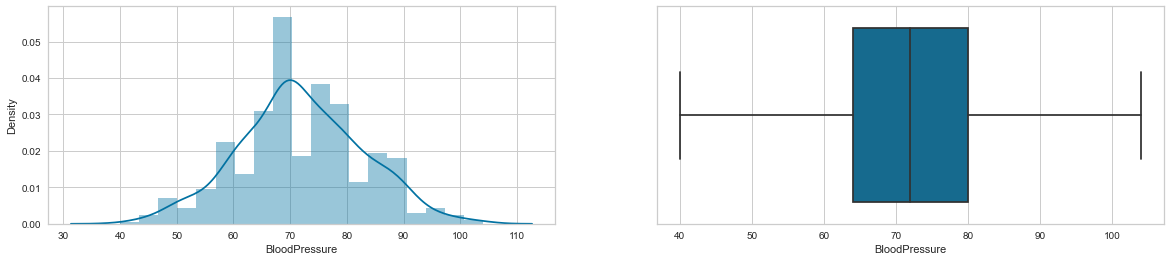

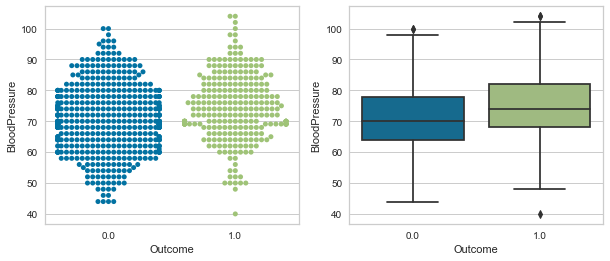

In [77]:
# --- Visualisasi variabel BloodPressure
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['BloodPressure'])

f.add_subplot(1,2,2)
sns.boxplot(df['BloodPressure'])

# --- Visualisasi variabel Outcome berdasarkan BloodPressure
f = plt.figure(figsize=(10,4))

f.add_subplot(1,2,1)
sns.swarmplot(x=df['Outcome'], y=df['BloodPressure'])

f.add_subplot(1,2,2)
sns.boxplot(x=df['Outcome'], y=df['BloodPressure'])

C:\Users\Punni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.7% of the 

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

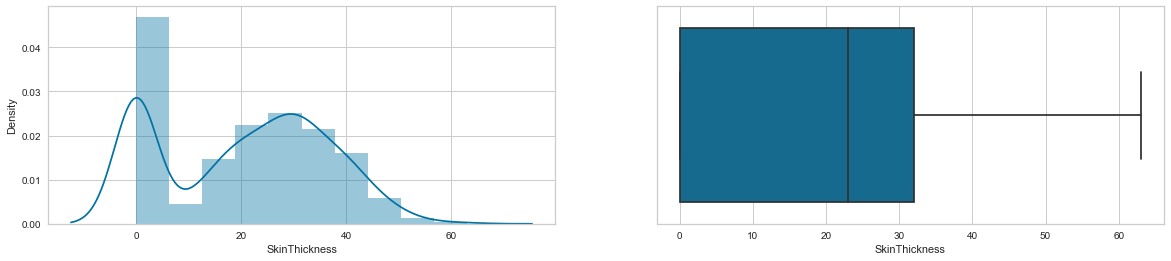

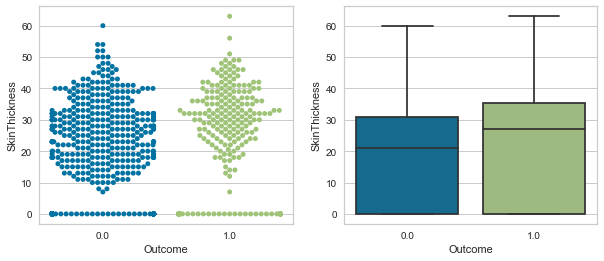

In [78]:
# --- Visualisasi variabel SkinThickness
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['SkinThickness'])

f.add_subplot(1,2,2)
sns.boxplot(df['SkinThickness'])

# --- Visualisasi variabel Outcome berdasarkan SkinThickness
f = plt.figure(figsize=(10,4))

f.add_subplot(1,2,1)
sns.swarmplot(x=df['Outcome'], y=df['SkinThickness'])

f.add_subplot(1,2,2)
sns.boxplot(x=df['Outcome'], y=df['SkinThickness'])

C:\Users\Punni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.8% of the 

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

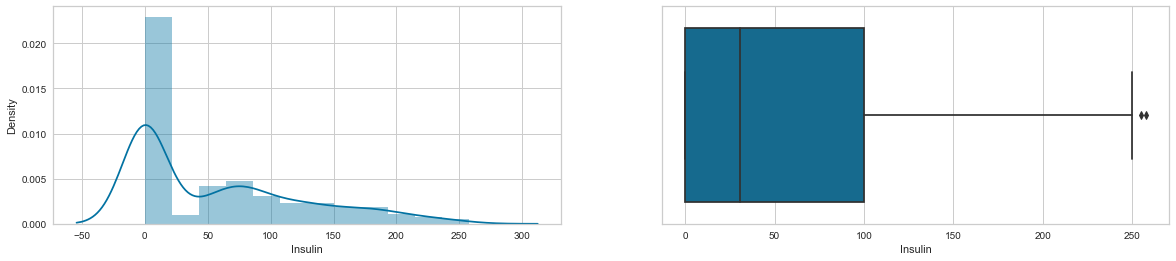

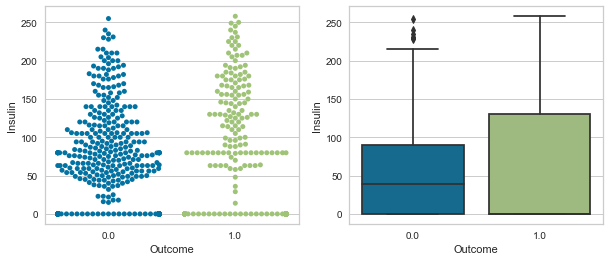

In [79]:
# --- Visualisasi variabel Insulin
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Insulin'])

f.add_subplot(1,2,2)
sns.boxplot(df['Insulin'])

# --- Visualisasi variabel Outcome berdasarkan Insulin
f = plt.figure(figsize=(10,4))

f.add_subplot(1,2,1)
sns.swarmplot(x=df['Outcome'], y=df['Insulin'])

f.add_subplot(1,2,2)
sns.boxplot(x=df['Outcome'], y=df['Insulin'])

C:\Users\Punni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

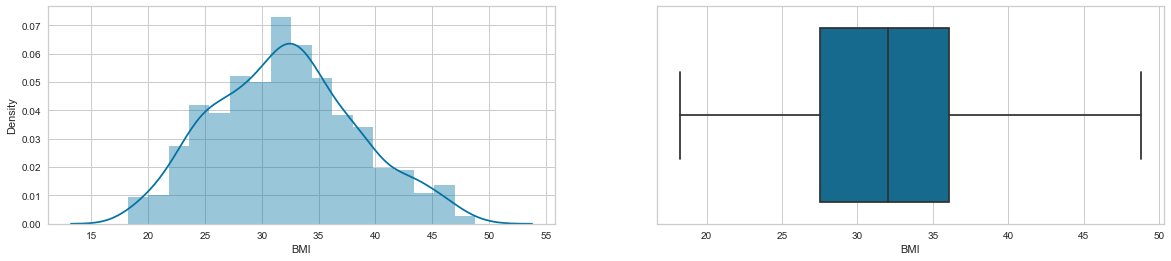

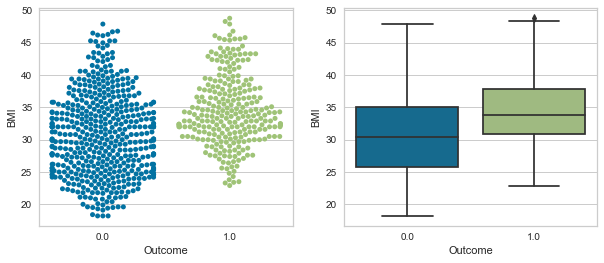

In [80]:
# --- Visualisasi variabel BMI
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['BMI'])

f.add_subplot(1,2,2)
sns.boxplot(df['BMI'])

# --- Visualisasi variabel Outcome berdasarkan DiabetesPedigreeFunction
f = plt.figure(figsize=(10,4))

f.add_subplot(1,2,1)
sns.swarmplot(x=df['Outcome'], y=df['BMI'])

f.add_subplot(1,2,2)
sns.boxplot(x=df['Outcome'], y=df['BMI'])

C:\Users\Punni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

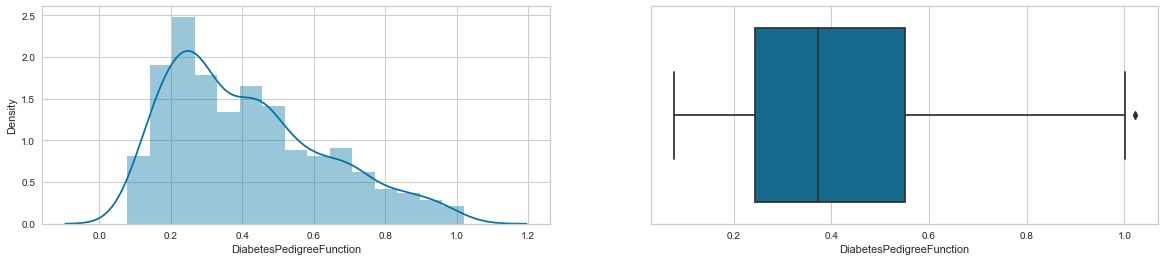

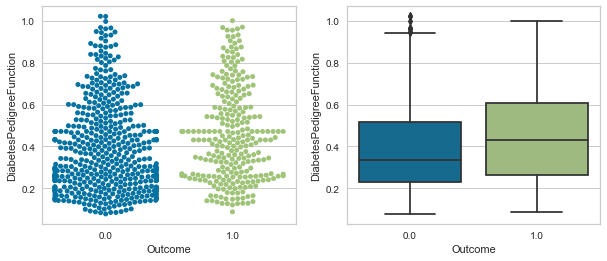

In [81]:
# --- Visualisasi variabel DiabetesPedigreeFunction
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['DiabetesPedigreeFunction'])

f.add_subplot(1,2,2)
sns.boxplot(df['DiabetesPedigreeFunction'])

# --- Visualisasi variabel Outcome berdasarkan DiabetesPedigreeFunction
f = plt.figure(figsize=(10,4))

f.add_subplot(1,2,1)
sns.swarmplot(x=df['Outcome'], y=df['DiabetesPedigreeFunction'])

f.add_subplot(1,2,2)
sns.boxplot(x=df['Outcome'], y=df['DiabetesPedigreeFunction'])

C:\Users\Punni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Punni\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

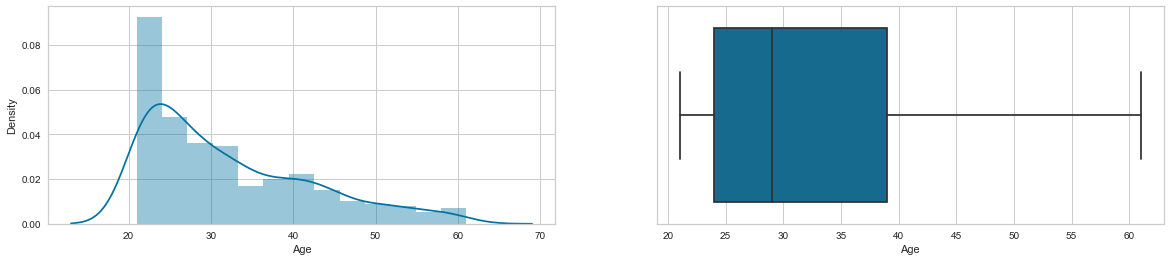

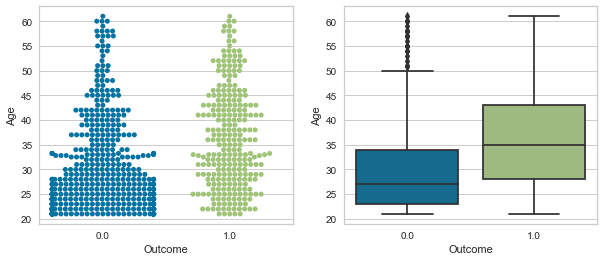

In [82]:
# --- Visualisasi variabel Age
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Age'])

f.add_subplot(1,2,2)
sns.boxplot(df['Age'])

# --- Visualisasi variabel Outcome berdasarkan Age
f = plt.figure(figsize=(10,4))

f.add_subplot(1,2,1)
sns.swarmplot(x=df['Outcome'], y=df['Age'])

f.add_subplot(1,2,2)
sns.boxplot(x=df['Outcome'], y=df['Age'])

C:\Users\Punni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

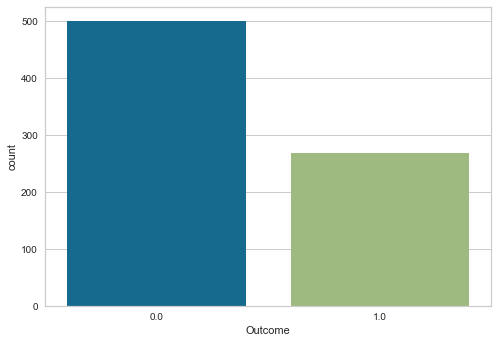

In [83]:
# --- Visualisasi variabel Outcome ---
sns.countplot(df['Outcome'])

# PREPROCESSING DATA

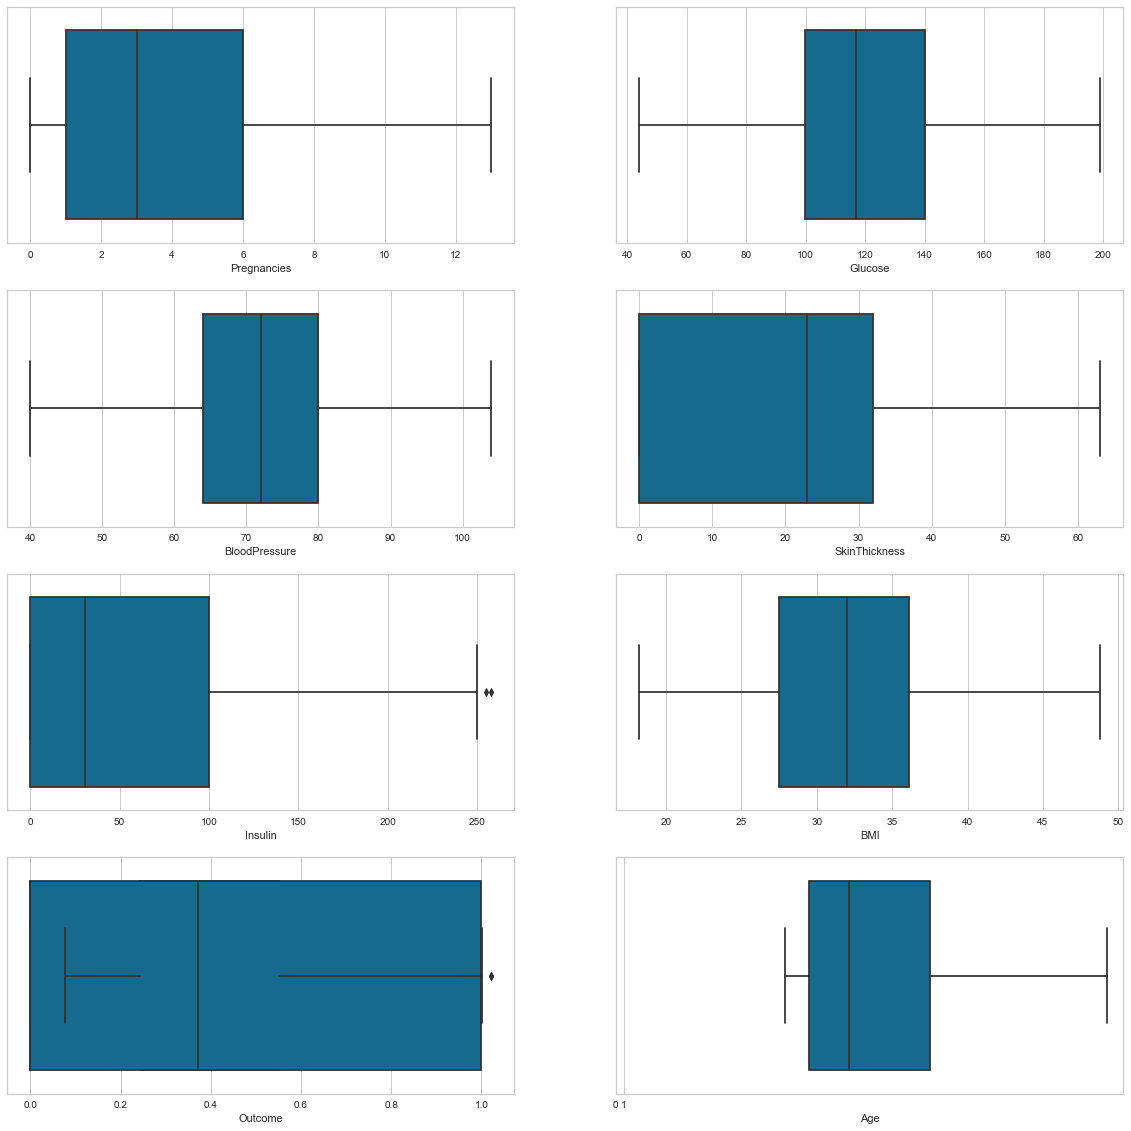

In [84]:
#menampilkan persebaran data di semua variabe dalam bentuk boxplot untuk melihat kehadiran outliers
cols = df.columns
fig, axes = plt.subplots(4,2,figsize=(20,20))
i = 0
j = 0
for col in cols[:]:
    sns.boxplot(x=df[col],ax=axes[i][j])
    plt.xticks(ticks=df[col].unique())
    j = j + 1
    if j >= 2:
        j = 0
        if i < 3:
            i = i + 1

In [85]:
# mengatasi outlier dengan menghapusnya
def outliers_detect(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    
    return df[column][(df[column] < (q1-1.5*IQR))|(df[column] > (q3 + 1.5*IQR))].tolist()

In [86]:
# menggantikan outlier yang sudah dihapus dengan nilai mean
def replace_outliers_with_mean(column,outliers):
    df[column] = np.where(df[column].isin(outliers),df[column].mean(),df[column])
    return df[column]

In [87]:
#mengimplementasikan fungsi penghapusan outlier ke semua variabel x
pregnancy_outliers = outliers_detect(cols[0])
glucose_outliers = outliers_detect(cols[1])
bp_outliers = outliers_detect(cols[2])
skinthickness_outliers = outliers_detect(cols[3])
insulin_outliers = outliers_detect(cols[4])
bmi_outliers = outliers_detect(cols[5])
DiabetesPidigreeFunction_outliers = outliers_detect(cols[6])
age_outliers = outliers_detect(cols[7])

outliers = [pregnancy_outliers,
           glucose_outliers,
            bp_outliers,
            skinthickness_outliers,
            insulin_outliers,
            bmi_outliers,
            DiabetesPidigreeFunction_outliers,
            age_outliers
           ]

In [88]:
#menggantikan semua data outliers yang sudah terhapus dengan data mean pada semua variabel x
for i, col in enumerate(cols[:-1]):
    df[col] = replace_outliers_with_mean(col,outliers[i])

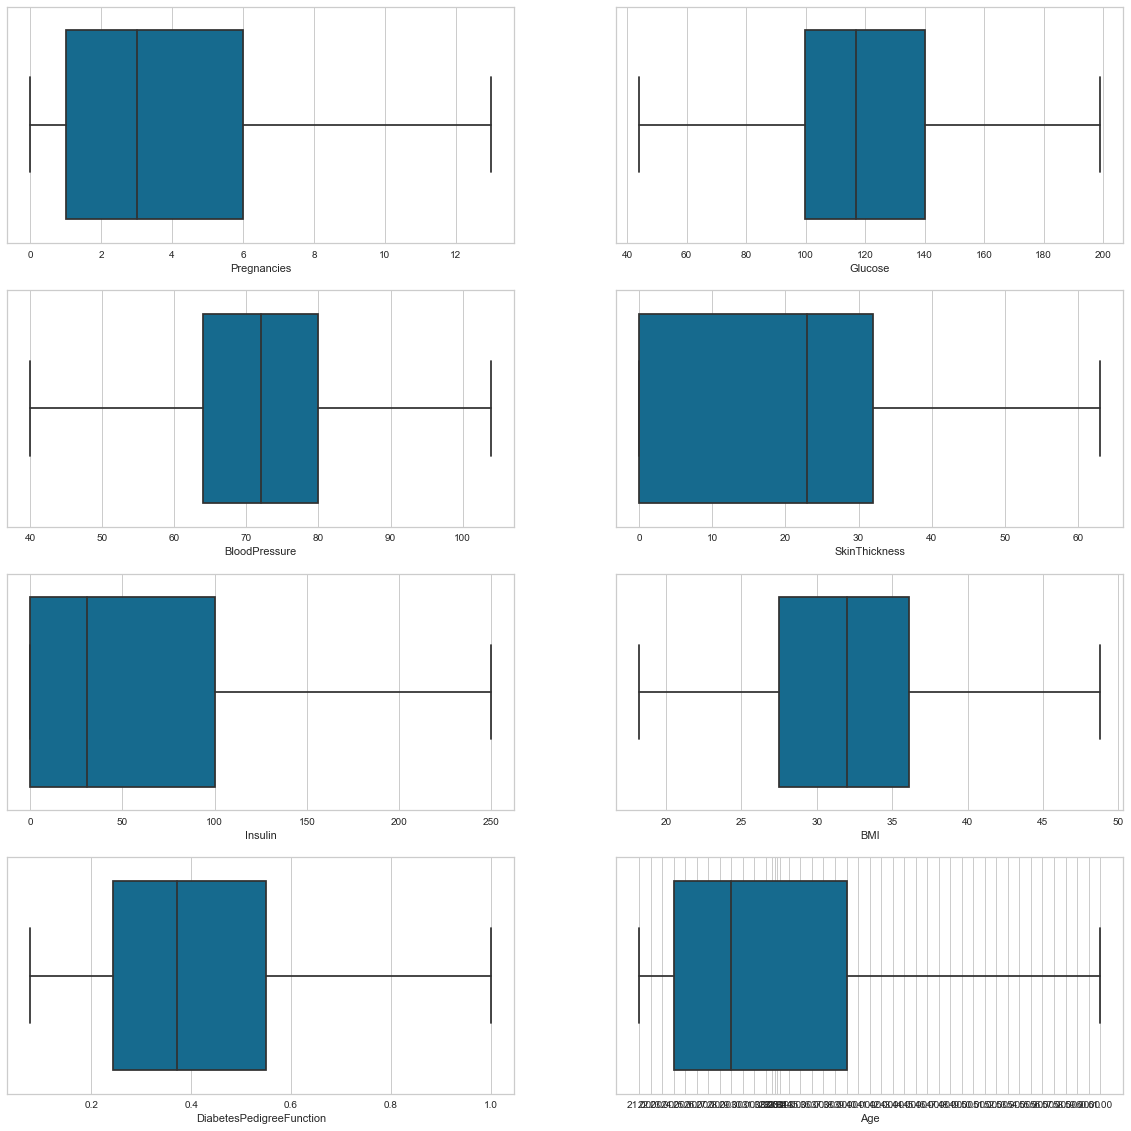

In [89]:
#melihat hasil boxplot untuk semua variabel x setelah di lakukan handling outliers
def make_figures():
    fig, axes = plt.subplots(4,2,figsize=(20,20))
    i = 0
    j = 0
    for col in cols[:-1]:
        sns.boxplot(x=df[col],ax=axes[i][j])
        plt.xticks(ticks=df[col].unique())
    
        j = j + 1
    
        if j >= 2:
            j = 0
            if i < 3:
                i = i + 1
        
make_figures()

In [90]:
#melakukan pemisahan variabel x dan variabel y
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [91]:
#melihat isi variabel y
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

# MODELLING

In [92]:
#melakukan splitting data set secara random
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=4)

In [93]:
#mengimplementasikan algortima decision tree
tree_classifier = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=35)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=35)

In [94]:
tree_pred = tree_classifier.predict(X_test)
tree_pred

array([1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0.])

In [95]:
y_test

390    0.0
146    0.0
136    0.0
420    0.0
328    1.0
      ... 
18     0.0
633    0.0
214    1.0
203    0.0
651    0.0
Name: Outcome, Length: 192, dtype: float64

In [96]:
accuracy_score(y_test,tree_pred)

0.8020833333333334

In [97]:
tree_conf_mat = confusion_matrix(y_test,tree_pred)
tree_conf_mat

array([[104,  22],
       [ 16,  50]], dtype=int64)

# EVALUATION

Akurasi Model (Train) : 78.47 %
Akurasi Model (Test)  : 80.21 %
.:. Decision Tree Accuracy: 80.21% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       126
         1.0       0.69      0.76      0.72        66

    accuracy                           0.80       192
   macro avg       0.78      0.79      0.79       192
weighted avg       0.81      0.80      0.80       192


.: Performance Evaluation
**************************


C:\Users\Punni\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


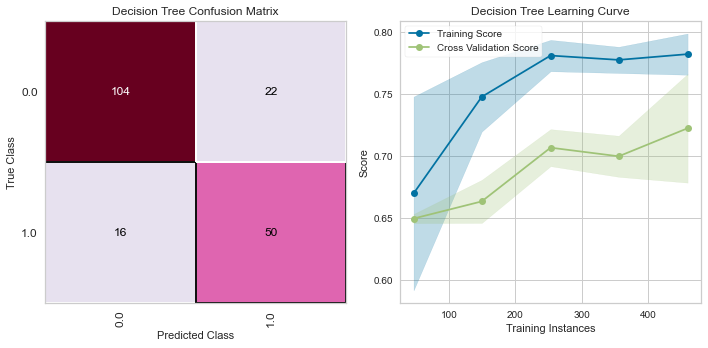

In [98]:
accuracy_train = tree_classifier.score(X_train, y_train)
accuracy_test  = tree_classifier.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")


# --- Decision Tree Accuracy ---
TreeDecision = accuracy_score(tree_pred, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(TreeDecision*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, tree_pred))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Decision Tree Confusion Matrix ---
tdcmatrix = ConfusionMatrix(tree_classifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
tdcmatrix.fit(X_train, y_train)
tdcmatrix.score(X_test, y_test)
tdcmatrix.finalize()

# --- Decision Tree Learning Curve ---
rcclc = LearningCurve(tree_classifier, ax=ax2, title='Decision Tree Learning Curve')
rcclc.fit(X_train, y_train)
rcclc.finalize()

plt.tight_layout();

# MENYIMPAN MODEL

In [103]:
#menyimpan model dengan joblib
joblib.dump((tree_classifier), "model_prediksi_diabetes.model")

['model_prediksi_diabetes.model']

# PREDIKSI

In [100]:
# # --- Turn Information into List ---
# data = [[6,148, 72, 35, 0, 28, 0.167, 21]]           

# # --- Prediction using Decision Tree ---
# result = tree_classifier.predict(data)

# # --- Cetak Hasil Prediksi Diabetes ---
# if result[0] == 1:
#   print('\033[1m' + 'Diabetes Terdeteksi' + '\033[0m')
# else:
#   print('\033[1m' + 'Diabetes Tidak Terdeteksi' + '\033[0m')

df_test = pd.DataFrame(data={
    "Pregnancies"                : [6],
    "Glucose"                    : [148],
    "BloodPressure"              : [80],
    "SkinThickness"              : [35],
    "Insulin"                    : [78],
    "BMI"                        : [1.2],
    "DiabetesPedigreeFunction"   : [0.167],
    "Age"                        : [70]
})

df_test[0:1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,80,35,78,1.2,0.167,70


In [101]:
pred_test = tree_classifier.predict(df_test[0:1])
pred_test[0]

0.0